## Import important libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df =pd.read_csv('Border_Crossing_Entry_Data.csv')
df

Port Name         State  Port Code            Border  \
0       Calexico East    California       2507  US-Mexico Border   
1           Van Buren         Maine        108  US-Canada Border   
2           Otay Mesa    California       2506  US-Mexico Border   
3             Nogales       Arizona       2604  US-Mexico Border   
4         Trout River      New York        715  US-Canada Border   
...               ...           ...        ...               ...   
346728         Norton       Vermont        211  US-Canada Border   
346729       Columbus    New Mexico       2406  US-Mexico Border   
346730       Hansboro  North Dakota       3415  US-Canada Border   
346731  Calexico East    California       2507  US-Mexico Border   
346732       Presidio         Texas       2403  US-Mexico Border   

                          Date                      Measure  Value  \
0       03/01/2019 12:00:00 AM                       Trucks  34447   
1       03/01/2019 12:00:00 AM         Rail Containers Full    428   
2       03/01/2019 12:00:00 AM                       Trucks  81217   
3       03/01/2019 12:00:00 AM                       Trains     62   
4       03/01/2019 12:00:00 AM  Personal Vehicle Passengers  16377   
...                        ...                          ...    ...   
346728  01/01/1996 12:00:00 AM  Personal Vehicle Passengers   9119   
346729  01/01/1996 12:00:00 AM            Personal Vehicles  29486   
346730  01/01/1996 12:00:00 AM         Rail Containers Full      0   
346731  01/01/1996 12:00:00 AM                        Buses      0   
346732  01/01/1996 12:00:00 AM                       Trucks    347   

                                     Location  
0        POINT (-115.48433000000001 32.67524)  
1                  POINT (-67.94271 47.16207)  
2                 POINT (-117.05333 32.57333)  
3       POINT (-110.93361 31.340279999999996)  
4        POINT (-73.44253 44.990010000000005)  
...                                       ...  
346728                   POINT (-71.79 45.01)  
346729                  POINT (-107.63 31.78)  
346730                      POINT (-99.35 49)  
346731                  POINT (-115.39 32.67)  
346732      POINT (-104.39000000000001 29.56)  

[346733 rows x 8 columns]

## Check shape and view basic statistical details using describe()

In [2]:
df.shape

(346733, 8)

In [3]:
df.describe()

Port Code         Value
count  346733.000000  3.467330e+05
mean     2455.504910  2.818767e+04
std      1201.208459  1.518588e+05
min       101.000000  0.000000e+00
25%      2304.000000  0.000000e+00
50%      3013.000000  9.000000e+01
75%      3402.000000  2.483000e+03
max      4105.000000  4.447374e+06

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [5]:
df.head()

Port Name       State  Port Code            Border  \
0  Calexico East  California       2507  US-Mexico Border   
1      Van Buren       Maine        108  US-Canada Border   
2      Otay Mesa  California       2506  US-Mexico Border   
3        Nogales     Arizona       2604  US-Mexico Border   
4    Trout River    New York        715  US-Canada Border   

                     Date                      Measure  Value  \
0  03/01/2019 12:00:00 AM                       Trucks  34447   
1  03/01/2019 12:00:00 AM         Rail Containers Full    428   
2  03/01/2019 12:00:00 AM                       Trucks  81217   
3  03/01/2019 12:00:00 AM                       Trains     62   
4  03/01/2019 12:00:00 AM  Personal Vehicle Passengers  16377   

                                Location  
0   POINT (-115.48433000000001 32.67524)  
1             POINT (-67.94271 47.16207)  
2            POINT (-117.05333 32.57333)  
3  POINT (-110.93361 31.340279999999996)  
4   POINT (-73.44253 44.990010000000005)

## Pre-process the data by converting Border values to country names

In [6]:
df["Border"] = ["Mexico" if i == "US-Mexico Border" else "Canada" for i in df.Border]

## Find unique values in each column

In [7]:
print("Unique port name: ",len(df["Port Name"].unique()))
print("Unique States: ",len(df["State"].unique()))
print("Unique Port Codes: ",len(df["Port Code"].unique()))
print("Unique Borders: ",len(df["Border"].unique()))
print("Unique measure of entries: ",len(df["Measure"].unique()))

Unique port name:  116
Unique States:  15
Unique Port Codes:  117
Unique Borders:  2
Unique measure of entries:  12


## Check for Null values

In [8]:
df.isnull().any()

Port Name    False
State        False
Port Code    False
Border       False
Date         False
Measure      False
Value        False
Location     False
dtype: bool

## import folium to visualize the data on a map

In [54]:
import folium
world_map =folium.Map(location=[37.09, -95.71],zoom_start=4)
world_map

## We need to format the Location column so that we can use it to plot the location on the map

In [10]:
#temp = df['Location']
df['Location']

0          POINT (-115.48433000000001 32.67524)
1                    POINT (-67.94271 47.16207)
2                   POINT (-117.05333 32.57333)
3         POINT (-110.93361 31.340279999999996)
4          POINT (-73.44253 44.990010000000005)
                          ...                  
346728                     POINT (-71.79 45.01)
346729                    POINT (-107.63 31.78)
346730                        POINT (-99.35 49)
346731                    POINT (-115.39 32.67)
346732        POINT (-104.39000000000001 29.56)
Name: Location, Length: 346733, dtype: object

##  First we strip POINT infront of our data

In [11]:
df['Location'] = df['Location'].str.lstrip('POINT')
df['Location']

0           (-115.48433000000001 32.67524)
1                     (-67.94271 47.16207)
2                    (-117.05333 32.57333)
3          (-110.93361 31.340279999999996)
4           (-73.44253 44.990010000000005)
                        ...               
346728                      (-71.79 45.01)
346729                     (-107.63 31.78)
346730                         (-99.35 49)
346731                     (-115.39 32.67)
346732         (-104.39000000000001 29.56)
Name: Location, Length: 346733, dtype: object

## Strip parenthsis from both sides

In [12]:
'''df['Location'] = df['Location'].map(lambda x: x.lstrip('('))
df['Location'].str.lstrip(')')
df['Location']'''
df['Location']= df['Location'].str.replace(r'\)', '')
df['Location']= df['Location'].str.replace(r'\(', '')
df['Location']

0           -115.48433000000001 32.67524
1                     -67.94271 47.16207
2                    -117.05333 32.57333
3          -110.93361 31.340279999999996
4           -73.44253 44.990010000000005
                       ...              
346728                      -71.79 45.01
346729                     -107.63 31.78
346730                         -99.35 49
346731                     -115.39 32.67
346732         -104.39000000000001 29.56
Name: Location, Length: 346733, dtype: object

In [13]:
df['Location'].shape

(346733,)

## Convert into two different columns

In [14]:
temp = df['Location']
temp.to_frame()
temp[0]
temp.shape
temp = pd.DataFrame(df['Location'].str.split(' ',2).tolist(),columns = ['z','Y','X'])
temp
temp.X.shape

(346733,)

## Insert into the dataframe

In [15]:
df.insert(8, "X", temp.X, True) 
df.insert(9,"Y",temp.Y,True)

In [16]:
df

Port Name         State  Port Code  Border  \
0       Calexico East    California       2507  Mexico   
1           Van Buren         Maine        108  Canada   
2           Otay Mesa    California       2506  Mexico   
3             Nogales       Arizona       2604  Mexico   
4         Trout River      New York        715  Canada   
...               ...           ...        ...     ...   
346728         Norton       Vermont        211  Canada   
346729       Columbus    New Mexico       2406  Mexico   
346730       Hansboro  North Dakota       3415  Canada   
346731  Calexico East    California       2507  Mexico   
346732       Presidio         Texas       2403  Mexico   

                          Date                      Measure  Value  \
0       03/01/2019 12:00:00 AM                       Trucks  34447   
1       03/01/2019 12:00:00 AM         Rail Containers Full    428   
2       03/01/2019 12:00:00 AM                       Trucks  81217   
3       03/01/2019 12:00:00 AM                       Trains     62   
4       03/01/2019 12:00:00 AM  Personal Vehicle Passengers  16377   
...                        ...                          ...    ...   
346728  01/01/1996 12:00:00 AM  Personal Vehicle Passengers   9119   
346729  01/01/1996 12:00:00 AM            Personal Vehicles  29486   
346730  01/01/1996 12:00:00 AM         Rail Containers Full      0   
346731  01/01/1996 12:00:00 AM                        Buses      0   
346732  01/01/1996 12:00:00 AM                       Trucks    347   

                              Location                   X  \
0         -115.48433000000001 32.67524            32.67524   
1                   -67.94271 47.16207            47.16207   
2                  -117.05333 32.57333            32.57333   
3        -110.93361 31.340279999999996  31.340279999999996   
4         -73.44253 44.990010000000005  44.990010000000005   
...                                ...                 ...   
346728                    -71.79 45.01               45.01   
346729                   -107.63 31.78               31.78   
346730                       -99.35 49                  49   
346731                   -115.39 32.67               32.67   
346732       -104.39000000000001 29.56               29.56   

                          Y  
0       -115.48433000000001  
1                 -67.94271  
2                -117.05333  
3                -110.93361  
4                 -73.44253  
...                     ...  
346728               -71.79  
346729              -107.63  
346730               -99.35  
346731              -115.39  
346732  -104.39000000000001  

[346733 rows x 10 columns]

In [17]:
df.head()

Port Name       State  Port Code  Border                    Date  \
0  Calexico East  California       2507  Mexico  03/01/2019 12:00:00 AM   
1      Van Buren       Maine        108  Canada  03/01/2019 12:00:00 AM   
2      Otay Mesa  California       2506  Mexico  03/01/2019 12:00:00 AM   
3        Nogales     Arizona       2604  Mexico  03/01/2019 12:00:00 AM   
4    Trout River    New York        715  Canada  03/01/2019 12:00:00 AM   

                       Measure  Value                        Location  \
0                       Trucks  34447    -115.48433000000001 32.67524   
1         Rail Containers Full    428              -67.94271 47.16207   
2                       Trucks  81217             -117.05333 32.57333   
3                       Trains     62   -110.93361 31.340279999999996   
4  Personal Vehicle Passengers  16377    -73.44253 44.990010000000005   

                    X                    Y  
0            32.67524  -115.48433000000001  
1            47.16207            -67.94271  
2            32.57333           -117.05333  
3  31.340279999999996           -110.93361  
4  44.990010000000005            -73.44253

## Plot 1st 1000 onto the map

In [18]:
df =df.iloc[:1000,:]
df.shape
df['Port Name']

0      Calexico East
1          Van Buren
2          Otay Mesa
3            Nogales
4        Trout River
           ...      
995         Eastport
996      Brownsville
997        Van Buren
998         Richford
999           Tecate
Name: Port Name, Length: 1000, dtype: object

In [19]:
#Create entry_map for plotting
entry_map =folium.Map(location=[37.09, -95.71],zoom_start=4)
entry_map

## Add point of entries on the map

In [20]:
entries = folium.map.FeatureGroup()
for lat,lon in zip(df.X,df.Y):
    entries.add_child(
    folium.CircleMarker(
    [lat,lon],
    radius=5,
    color='yellow',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6,
        )
    )
entry_map.add_child(entries)

## We can also add marker on the map with labels

In [21]:
latitudes = list(df.X)
longitudes = list(df.Y)
labels = list(df['Port Name'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(entry_map)    
    
# add incidents to map
entry_map.add_child(entries)

## If the markers look more congested we can remove them and add labels on points

In [22]:
entry_map = folium.Map(location=[37.09, -95.71], zoom_start=4)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df.X, df.Y, df.Measure):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(entry_map)

# show map
entry_map

## We can make cluster maps. Whenever we zoon the clusters will split

In [23]:
from folium import plugins

cluster_map = folium.Map(location = [37.09, -95.71], zoom_start = 4)

entries = plugins.MarkerCluster().add_to(cluster_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.X, df.Y, df['Port Name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(entries)

# display map
cluster_map

## Violinplots of State Vs Value (no of people crossing the border)

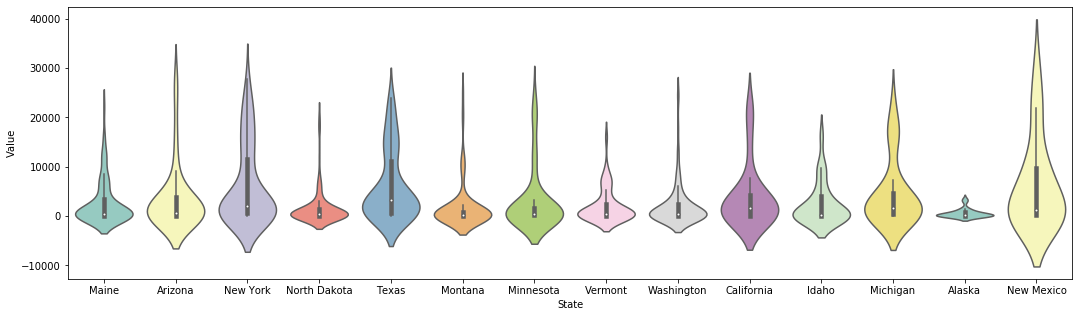

In [24]:
plt.figure(figsize=(18,5))
ax = sns.violinplot(x="State", y="Value",
                    data=df[df.Value < 30000],
                    scale="width", palette="Set3")

## Pie-chars of different states. Limit the states to Top 6 states 

In [25]:
df_state =df.groupby('State',axis=0).sum()
df_state=df_state.drop(columns=['Port Code'])
#Top 5 States
df_state = df_state.sort_values(['Value'], ascending=[0])
df_state
limit = 6
df_state = df_state.iloc[:limit,:]
df_state

Value
State               
California  13206769
Texas       13150923
Arizona      3617901
New York     2334147
Washington   2187398
Michigan     2150456

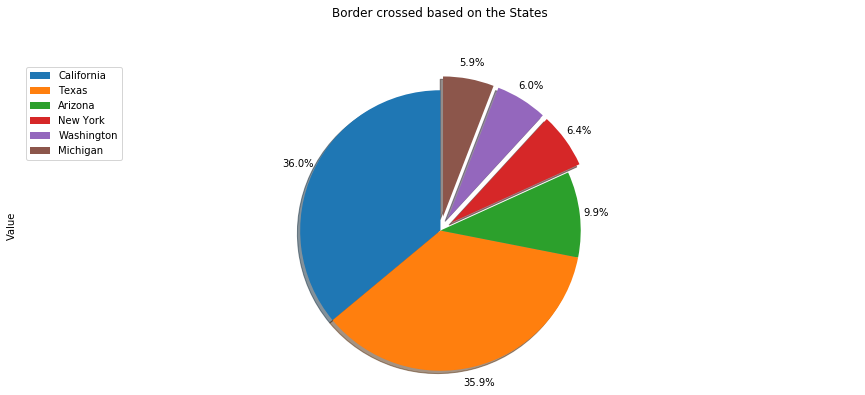

In [26]:
explode_list = [0, 0, 0, 0.1,0.1,0.1]

df_state['Value'].plot(kind='pie',figsize=(15,6), autopct='%1.1f%%',startangle=90,shadow=True,pctdistance=1.12,explode=explode_list,labels=None)
plt.title('Border crossed based on the States',y=1.12)
plt.legend(labels=df_state.index, loc='upper left')
plt.axis('equal') 
plt.show()

## Pie-chars of different Measures of entry. Limit the Measures to Top 6. 

In [27]:
df_measure=df.groupby('Measure',axis=0).sum()
df_measure=df_measure.drop(columns=['Port Code'])
df_measure=df_measure.sort_values(['Value'],ascending=[0])
limit=6
df_measure=df_measure.iloc[:limit,:]
df_measure

Value
Measure                              
Personal Vehicle Passengers  20574990
Personal Vehicles            10230407
Pedestrians                   4864803
Trucks                        1241538
Truck Containers Full          875790
Truck Containers Empty         384488

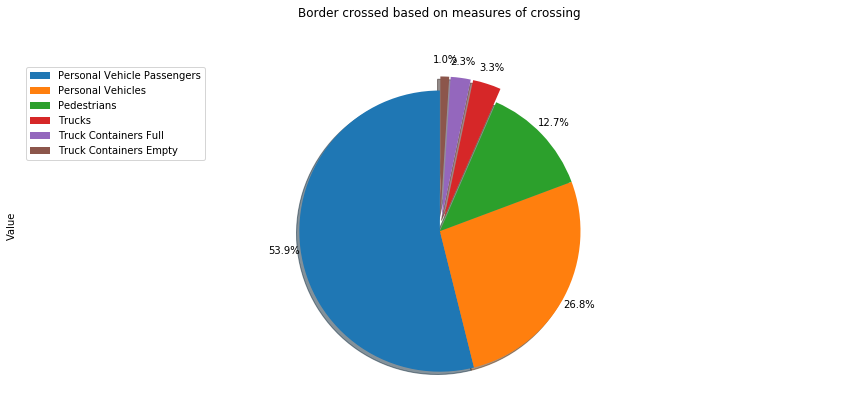

In [28]:
explode_list = [0, 0,0,0.1,0.1,0.1]

df_measure['Value'].plot(kind='pie',figsize=(15,6), autopct='%1.1f%%',startangle=90,shadow=True,pctdistance=1.12,explode=explode_list,labels=None)
plt.title('Border crossed based on measures of crossing',y=1.12)
plt.legend(labels=df_measure.index, loc='upper left')
plt.axis('equal') 
plt.show()

## Pie-Chart of number of entries from Mexico and Canada Border

In [29]:
df_country=df.groupby('Border').sum()
df_country=df_country.drop(columns=['Port Code'])
df_country

Value
Border          
Canada   8422400
Mexico  30459529

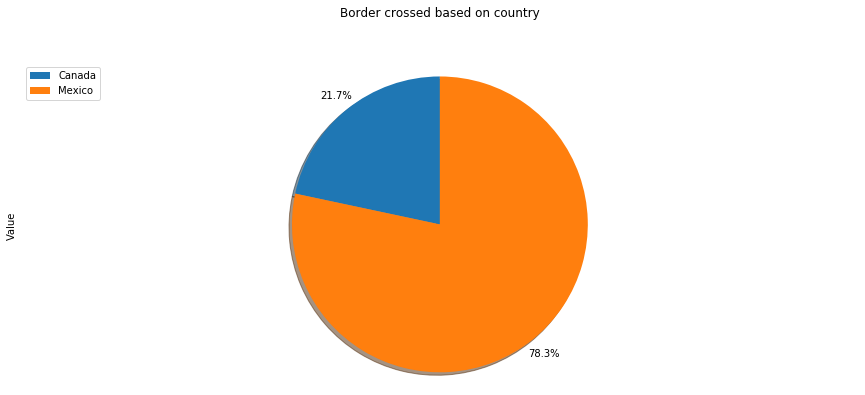

In [30]:
df_country['Value'].plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,pctdistance=1.12,labels=None)
plt.title('Border crossed based on country',y=1.12)
plt.legend(labels=df_country.index, loc='upper left')
plt.axis('equal') 
plt.show()

## Pie-chart of entries from different Ports. Limit upto 10 Ports

In [31]:
df_port=df.groupby('Port Name').sum()
df_port=df_port.drop(columns=['Port Code'])
df_port=df_port.sort_values(['Value'],ascending=[0])
df_port.head(10)
df_port = df_port.iloc[:10,:]
df_port

Value
Port Name                     
San Ysidro             6966131
El Paso                3990538
Brownsville            2224172
Calexico               2193790
Laredo                 2192509
Otay Mesa              2107451
Nogales                1714086
Hidalgo                1664613
Blaine                 1331842
Buffalo-Niagara Falls  1322195

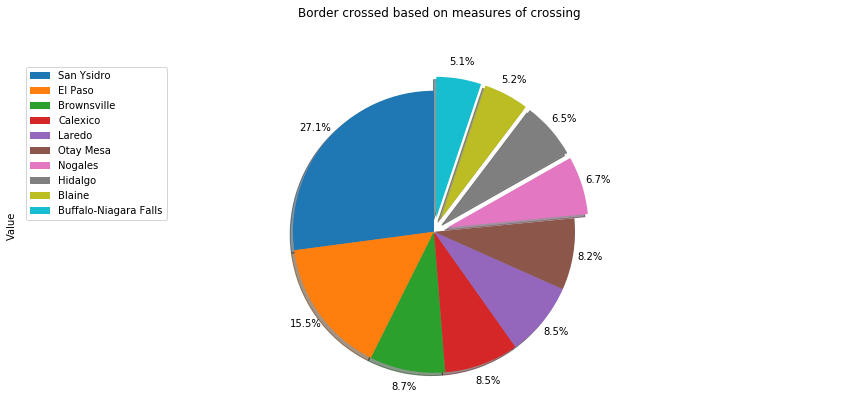

In [32]:
exp_list = [0, 0,0,0,0,0,0.1,0.1,0.1,0.1]

df_port['Value'].plot(kind='pie',figsize=(15,6), autopct='%1.1f%%',startangle=90,shadow=True,pctdistance=1.12,explode=exp_list,labels=None)
plt.title('Border crossed based on measures of crossing',y=1.12)
plt.legend(labels=df_port.index, loc='upper left')
plt.axis('equal') 
plt.show()

In [33]:
df

Port Name       State  Port Code  Border                    Date  \
0    Calexico East  California       2507  Mexico  03/01/2019 12:00:00 AM   
1        Van Buren       Maine        108  Canada  03/01/2019 12:00:00 AM   
2        Otay Mesa  California       2506  Mexico  03/01/2019 12:00:00 AM   
3          Nogales     Arizona       2604  Mexico  03/01/2019 12:00:00 AM   
4      Trout River    New York        715  Canada  03/01/2019 12:00:00 AM   
..             ...         ...        ...     ...                     ...   
995       Eastport       Idaho       3302  Canada  02/01/2019 12:00:00 AM   
996    Brownsville       Texas       2301  Mexico  02/01/2019 12:00:00 AM   
997      Van Buren       Maine        108  Canada  02/01/2019 12:00:00 AM   
998       Richford     Vermont        203  Canada  02/01/2019 12:00:00 AM   
999         Tecate  California       2505  Mexico  02/01/2019 12:00:00 AM   

                         Measure   Value                        Location  \
0                         Trucks   34447    -115.48433000000001 32.67524   
1           Rail Containers Full     428              -67.94271 47.16207   
2                         Trucks   81217             -117.05333 32.57333   
3                         Trains      62   -110.93361 31.340279999999996   
4    Personal Vehicle Passengers   16377    -73.44253 44.990010000000005   
..                           ...     ...                             ...   
995               Bus Passengers     228    -116.18027999999998 48.99944   
996       Truck Containers Empty   10172              -97.49722 25.90139   
997             Train Passengers      60              -67.94271 47.16207   
998                       Trucks     458     -72.67832000000001 44.98588   
999  Personal Vehicle Passengers  151542             -116.62667 32.57722   

                      X                    Y  
0              32.67524  -115.48433000000001  
1              47.16207            -67.94271  
2              32.57333           -117.05333  
3    31.340279999999996           -110.93361  
4    44.990010000000005            -73.44253  
..                  ...                  ...  
995            48.99944  -116.18027999999998  
996            25.90139            -97.49722  
997            47.16207            -67.94271  
998            44.98588   -72.67832000000001  
999            32.57722           -116.62667  

[1000 rows x 10 columns]

## Bar Chart of States Vs no of entries(Values) . We can see that california has the highest no fo entries

In [34]:
df_state =df.groupby('State',axis=0).sum()
df_state=df_state.drop(columns=['Port Code'])
#Top 5 States
df_state = df_state.sort_values(['Value'], ascending=[0])
df_state

Value
State                 
California    13206769
Texas         13150923
Arizona        3617901
New York       2334147
Washington     2187398
Michigan       2150456
Maine           539870
New Mexico      483936
Vermont         338662
Minnesota       325304
North Dakota    286078
Montana         179488
Idaho            65460
Alaska           15537

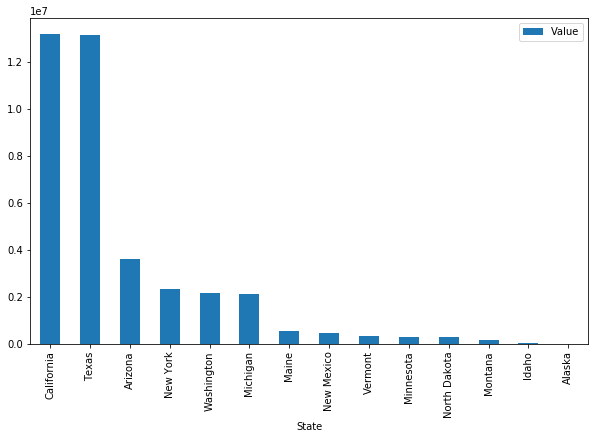

In [35]:
df_state.plot(kind='bar', figsize=(10, 6), rot=90) 

## Bar Chart of Measure of Entry Vs No of entries(Values) . We can see that no of entries are more by personal entry passengers.

In [36]:
df_measure=df.groupby('Measure',axis=0).sum()
df_measure=df_measure.drop(columns=['Port Code'])
df_measure=df_measure.sort_values(['Value'],ascending=[0])
df_measure

Value
Measure                              
Personal Vehicle Passengers  20574990
Personal Vehicles            10230407
Pedestrians                   4864803
Trucks                        1241538
Truck Containers Full          875790
Truck Containers Empty         384488
Bus Passengers                 310572
Rail Containers Full           242659
Rail Containers Empty          120493
Buses                           17990
Train Passengers                14766
Trains                           3433

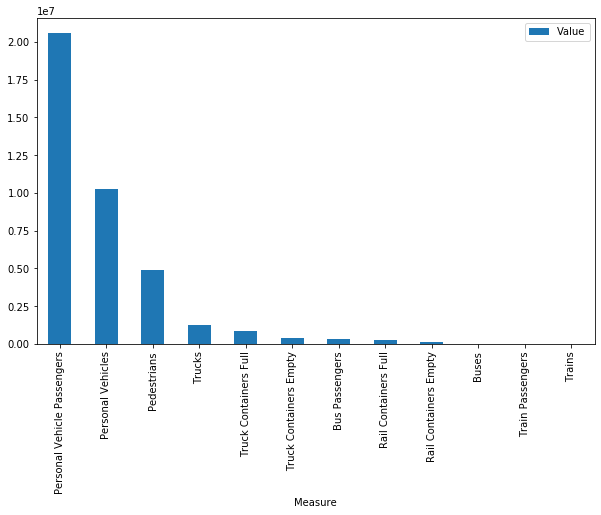

In [37]:
df_measure.plot(kind='bar', figsize=(10, 6), rot=90) 

## Bar chart of No of entries from Mexico Vs Canada. We can see that entries from Mexico are more.

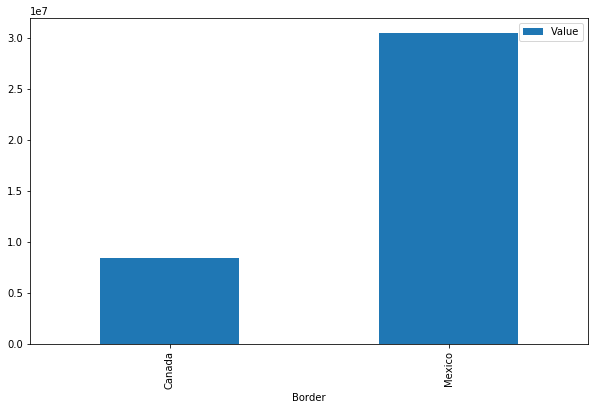

In [38]:
df_country.plot(kind='bar',figsize=(10,6),rot=90)

## Bar chart of Ports vs no of entries from that port

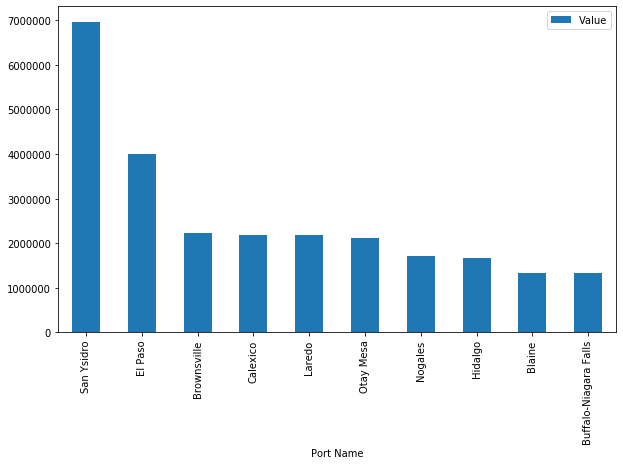

In [39]:
df_port.plot(kind='bar',figsize=(10,6),rot=90)

## Bar chart of State Vs no fo entries using Seaborn.

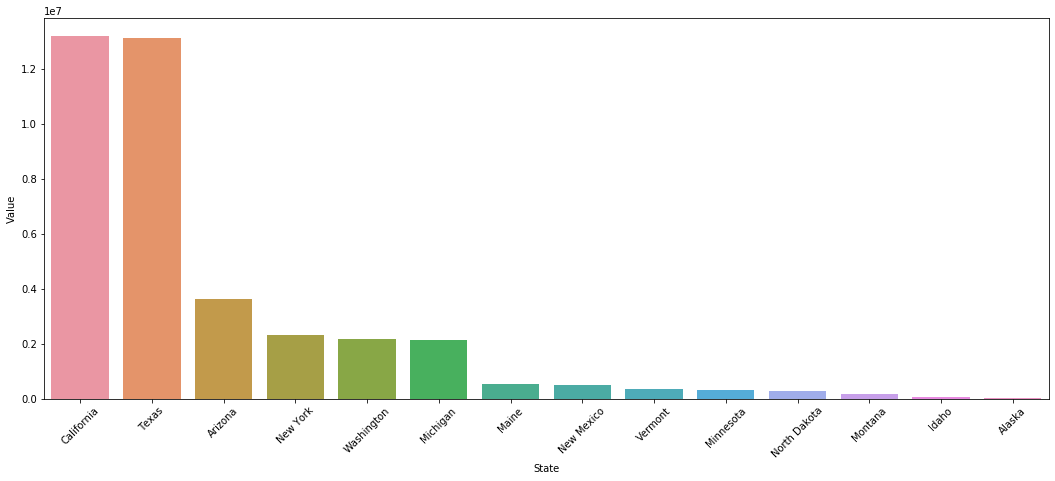

In [40]:
#Using Seaborn
import seaborn as sns

plt.figure(figsize=(18,7))
sns.barplot(x = df_state.index, y = "Value", data = df_state)
plt.xticks(rotation=45)
plt.show()

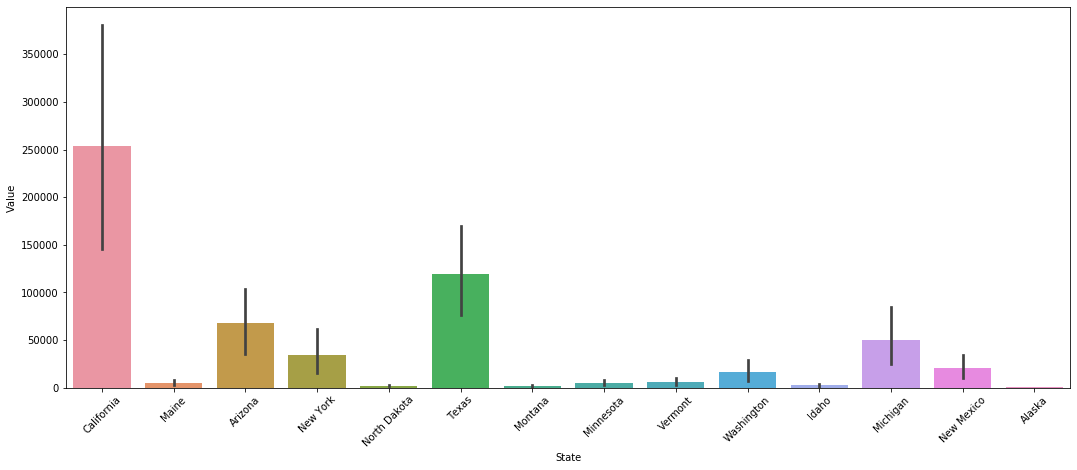

In [41]:
plt.figure(figsize=(18,7))
sns.barplot(x = "State", y = "Value", data = df)
plt.xticks(rotation=45)
plt.show()

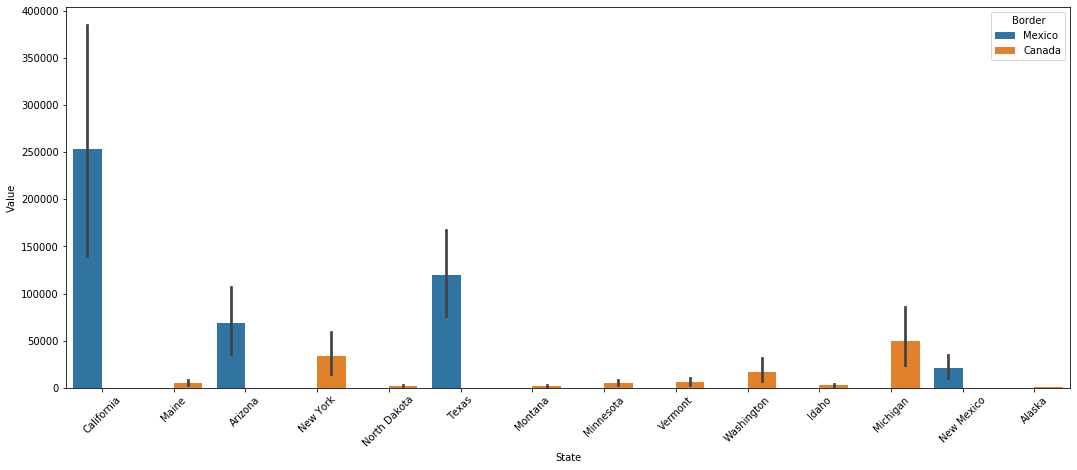

In [42]:
plt.figure(figsize=(18,7))
sns.barplot(x = "State", y = "Value",hue='Border', data = df)
plt.xticks(rotation=45)
plt.show()

## Bar Chart of Measure of entry vs no of entries using that Measure using Seaborn.

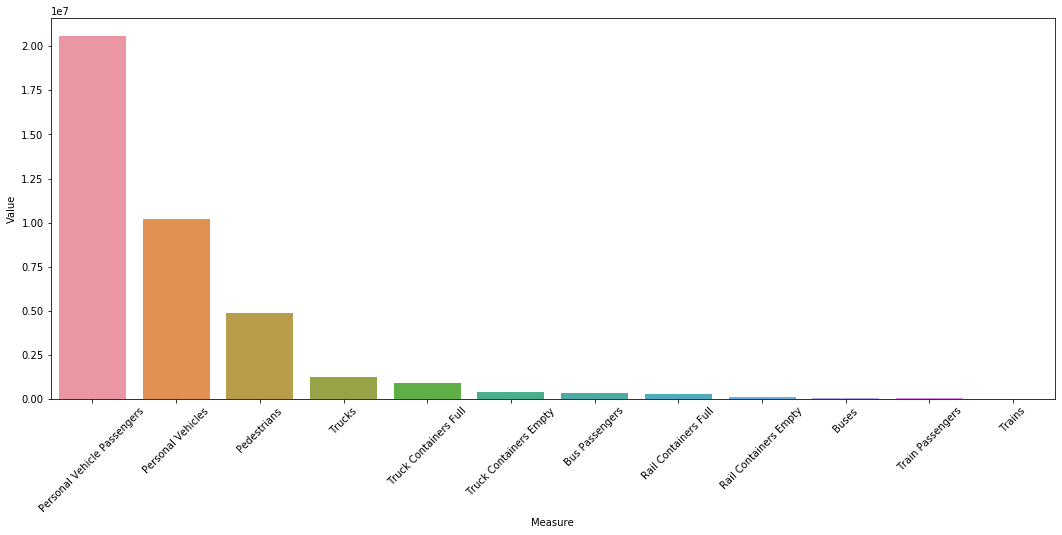

In [43]:
plt.figure(figsize=(18,7))
sns.barplot(x = df_measure.index, y = "Value", data = df_measure)
plt.xticks(rotation=45)
plt.show()

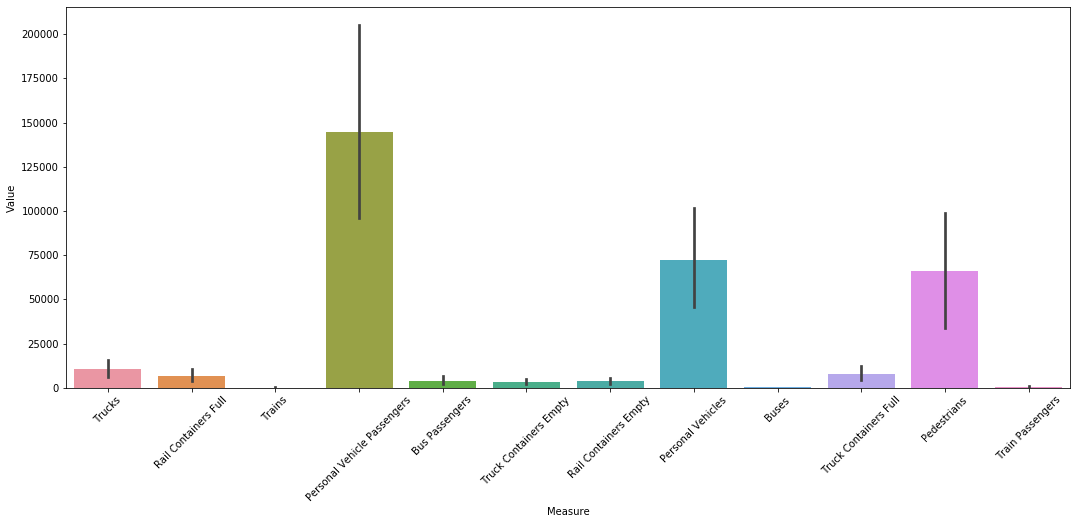

In [44]:
plt.figure(figsize=(18,7))
sns.barplot(x = "Measure", y = "Value", data = df)
plt.xticks(rotation=45)
plt.show()

## Bar Chart of Port vs No of entries from that port

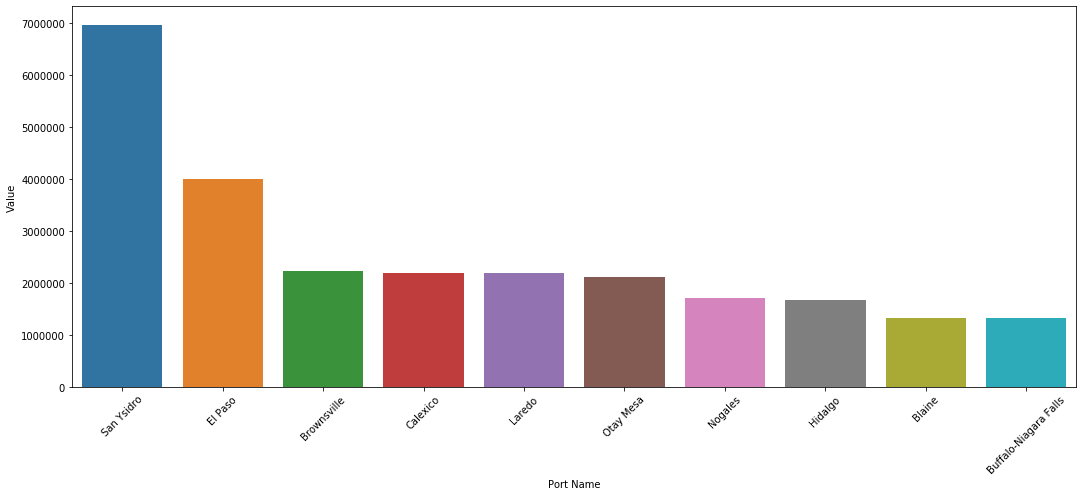

In [45]:
plt.figure(figsize=(18,7))
sns.barplot(x = df_port.index, y = "Value", data = df_port)
plt.xticks(rotation=45)
plt.show()

## Boxenplot of Mexico VS Canada 

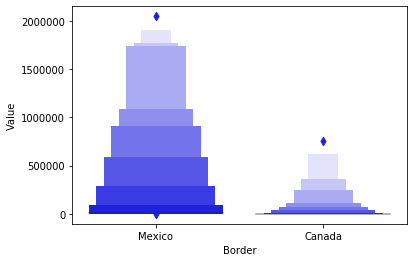

In [46]:
sns.boxenplot(x="Border", y="Value",
              color="b",
              scale="linear", data=df)
plt.show()

In [47]:
df

Port Name       State  Port Code  Border                    Date  \
0    Calexico East  California       2507  Mexico  03/01/2019 12:00:00 AM   
1        Van Buren       Maine        108  Canada  03/01/2019 12:00:00 AM   
2        Otay Mesa  California       2506  Mexico  03/01/2019 12:00:00 AM   
3          Nogales     Arizona       2604  Mexico  03/01/2019 12:00:00 AM   
4      Trout River    New York        715  Canada  03/01/2019 12:00:00 AM   
..             ...         ...        ...     ...                     ...   
995       Eastport       Idaho       3302  Canada  02/01/2019 12:00:00 AM   
996    Brownsville       Texas       2301  Mexico  02/01/2019 12:00:00 AM   
997      Van Buren       Maine        108  Canada  02/01/2019 12:00:00 AM   
998       Richford     Vermont        203  Canada  02/01/2019 12:00:00 AM   
999         Tecate  California       2505  Mexico  02/01/2019 12:00:00 AM   

                         Measure   Value                        Location  \
0                         Trucks   34447    -115.48433000000001 32.67524   
1           Rail Containers Full     428              -67.94271 47.16207   
2                         Trucks   81217             -117.05333 32.57333   
3                         Trains      62   -110.93361 31.340279999999996   
4    Personal Vehicle Passengers   16377    -73.44253 44.990010000000005   
..                           ...     ...                             ...   
995               Bus Passengers     228    -116.18027999999998 48.99944   
996       Truck Containers Empty   10172              -97.49722 25.90139   
997             Train Passengers      60              -67.94271 47.16207   
998                       Trucks     458     -72.67832000000001 44.98588   
999  Personal Vehicle Passengers  151542             -116.62667 32.57722   

                      X                    Y  
0              32.67524  -115.48433000000001  
1              47.16207            -67.94271  
2              32.57333           -117.05333  
3    31.340279999999996           -110.93361  
4    44.990010000000005            -73.44253  
..                  ...                  ...  
995            48.99944  -116.18027999999998  
996            25.90139            -97.49722  
997            47.16207            -67.94271  
998            44.98588   -72.67832000000001  
999            32.57722           -116.62667  

[1000 rows x 10 columns]

# Let's make a word cloud of all the ports. Convert all values in Port Names into text.

In [48]:
from wordcloud import WordCloud, ImageColorGenerator
text=" ".join(str(port) for port in df['Port Name'])
text

'Calexico East Van Buren Otay Mesa Nogales Trout River Madawaska Pembina Progreso Portal Champlain-Rouses Point Opheim Neche Lancaster Derby Line Sarles Wildhorse Derby Line Lynden Vanceboro San Ysidro Scobey Beecher Falls Calais Massena Oroville Hansboro Ferry Pembina Tecate Eastport Walhalla Calais Roma Naco Boquillas Raymond Porthill Norton Sault Sainte Marie Antler Otay Mesa Eastport Rio Grande City Portal Del Rio Sasabe Sault Sainte Marie Highgate Springs-Alburg Madawaska Sasabe Del Bonita Vanceboro Neche Houlton Norton Del Rio Houlton Metaline Falls Houlton Sault Sainte Marie Fort Fairfield Noonan Westhope Van Buren Massena Blaine Douglas Port Huron Champlain-Rouses Point Champlain-Rouses Point Nogales Scobey Del Bonita Bridgewater Santa Teresa Otay Mesa San Ysidro Nogales Lukeville Roseau Skagway Fortuna Frontier Vanceboro Baudette Sarles Fort Kent Grand Portage Buffalo-Niagara Falls Calexico Massena Otay Mesa Pinecreek Calexico East Otay Mesa Otay Mesa Douglas Grand Portage Nor

## Wordcloud with max 100 words 

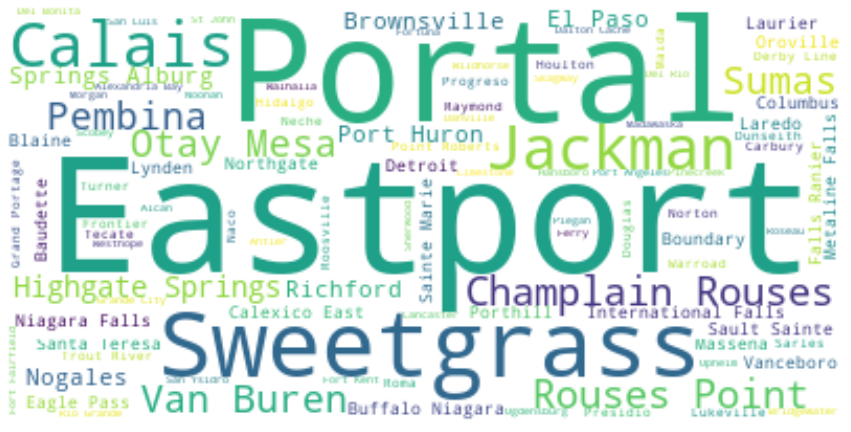

In [49]:
word_cloud = WordCloud(max_words=100,background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Count plots of Measure vs Border

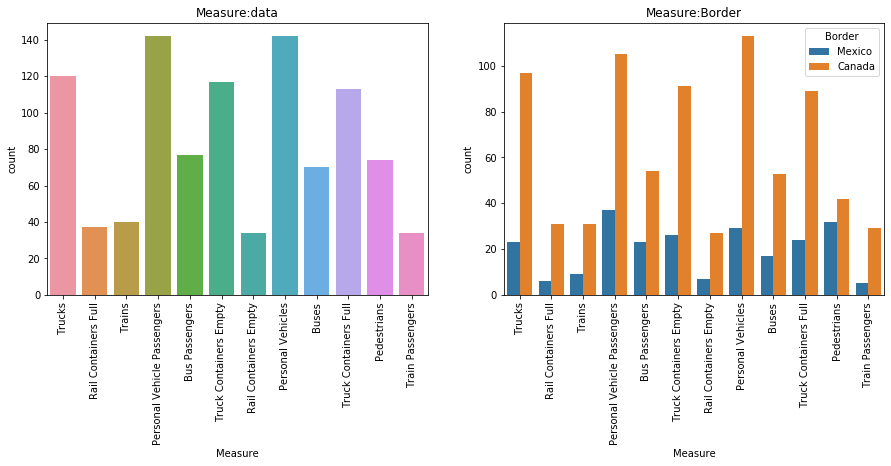

In [50]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
chart1=sns.countplot(df['Measure'],hue='Border',data=df,ax=ax[1])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2=sns.countplot(df['Measure'],data=df,ax=ax[0])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
ax[0].title.set_text("Measure:data")
ax[1].title.set_text("Measure:Border")

## Count plots of State vs Border

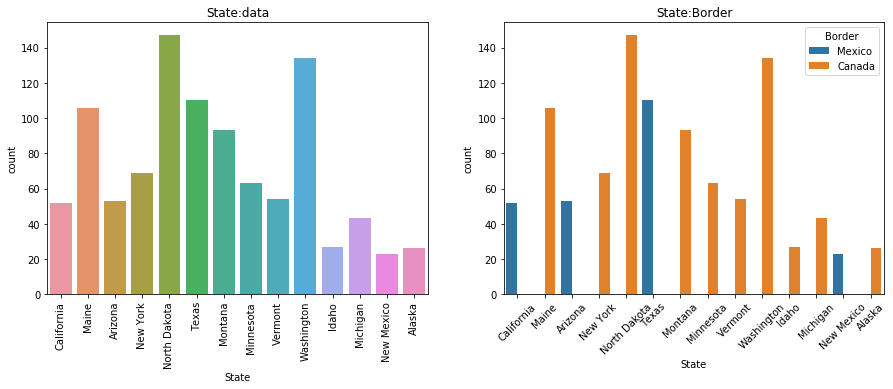

In [51]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
chart1=sns.countplot(df['State'],hue='Border',data=df,ax=ax[1])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart2=sns.countplot(df['State'],data=df,ax=ax[0])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
ax[0].title.set_text("State:data")
ax[1].title.set_text("State:Border")

## Let's  plot line chart. We read the dataset into a new dataframe df_date

In [52]:
df_date =pd.read_csv('Border_Crossing_Entry_Data.csv')
df_date

Port Name         State  Port Code            Border  \
0       Calexico East    California       2507  US-Mexico Border   
1           Van Buren         Maine        108  US-Canada Border   
2           Otay Mesa    California       2506  US-Mexico Border   
3             Nogales       Arizona       2604  US-Mexico Border   
4         Trout River      New York        715  US-Canada Border   
...               ...           ...        ...               ...   
346728         Norton       Vermont        211  US-Canada Border   
346729       Columbus    New Mexico       2406  US-Mexico Border   
346730       Hansboro  North Dakota       3415  US-Canada Border   
346731  Calexico East    California       2507  US-Mexico Border   
346732       Presidio         Texas       2403  US-Mexico Border   

                          Date                      Measure  Value  \
0       03/01/2019 12:00:00 AM                       Trucks  34447   
1       03/01/2019 12:00:00 AM         Rail Containers Full    428   
2       03/01/2019 12:00:00 AM                       Trucks  81217   
3       03/01/2019 12:00:00 AM                       Trains     62   
4       03/01/2019 12:00:00 AM  Personal Vehicle Passengers  16377   
...                        ...                          ...    ...   
346728  01/01/1996 12:00:00 AM  Personal Vehicle Passengers   9119   
346729  01/01/1996 12:00:00 AM            Personal Vehicles  29486   
346730  01/01/1996 12:00:00 AM         Rail Containers Full      0   
346731  01/01/1996 12:00:00 AM                        Buses      0   
346732  01/01/1996 12:00:00 AM                       Trucks    347   

                                     Location  
0        POINT (-115.48433000000001 32.67524)  
1                  POINT (-67.94271 47.16207)  
2                 POINT (-117.05333 32.57333)  
3       POINT (-110.93361 31.340279999999996)  
4        POINT (-73.44253 44.990010000000005)  
...                                       ...  
346728                   POINT (-71.79 45.01)  
346729                  POINT (-107.63 31.78)  
346730                      POINT (-99.35 49)  
346731                  POINT (-115.39 32.67)  
346732      POINT (-104.39000000000001 29.56)  

[346733 rows x 8 columns]

## Convert the Data columns into pandas readable format and set it as index

In [56]:
df_date["DateAsDateObj"] = pd.to_datetime(df_date.Date)
df_date = df_date.set_index("DateAsDateObj")
df_date

Port Name         State  Port Code            Border  \
DateAsDateObj                                                             
2019-03-01     Calexico East    California       2507  US-Mexico Border   
2019-03-01         Van Buren         Maine        108  US-Canada Border   
2019-03-01         Otay Mesa    California       2506  US-Mexico Border   
2019-03-01           Nogales       Arizona       2604  US-Mexico Border   
2019-03-01       Trout River      New York        715  US-Canada Border   
...                      ...           ...        ...               ...   
1996-01-01            Norton       Vermont        211  US-Canada Border   
1996-01-01          Columbus    New Mexico       2406  US-Mexico Border   
1996-01-01          Hansboro  North Dakota       3415  US-Canada Border   
1996-01-01     Calexico East    California       2507  US-Mexico Border   
1996-01-01          Presidio         Texas       2403  US-Mexico Border   

                                 Date                      Measure  Value  \
DateAsDateObj                                                               
2019-03-01     03/01/2019 12:00:00 AM                       Trucks  34447   
2019-03-01     03/01/2019 12:00:00 AM         Rail Containers Full    428   
2019-03-01     03/01/2019 12:00:00 AM                       Trucks  81217   
2019-03-01     03/01/2019 12:00:00 AM                       Trains     62   
2019-03-01     03/01/2019 12:00:00 AM  Personal Vehicle Passengers  16377   
...                               ...                          ...    ...   
1996-01-01     01/01/1996 12:00:00 AM  Personal Vehicle Passengers   9119   
1996-01-01     01/01/1996 12:00:00 AM            Personal Vehicles  29486   
1996-01-01     01/01/1996 12:00:00 AM         Rail Containers Full      0   
1996-01-01     01/01/1996 12:00:00 AM                        Buses      0   
1996-01-01     01/01/1996 12:00:00 AM                       Trucks    347   

                                            Location  
DateAsDateObj                                         
2019-03-01      POINT (-115.48433000000001 32.67524)  
2019-03-01                POINT (-67.94271 47.16207)  
2019-03-01               POINT (-117.05333 32.57333)  
2019-03-01     POINT (-110.93361 31.340279999999996)  
2019-03-01      POINT (-73.44253 44.990010000000005)  
...                                              ...  
1996-01-01                      POINT (-71.79 45.01)  
1996-01-01                     POINT (-107.63 31.78)  
1996-01-01                         POINT (-99.35 49)  
1996-01-01                     POINT (-115.39 32.67)  
1996-01-01         POINT (-104.39000000000001 29.56)  

[346733 rows x 8 columns]

## Line chart of no of entries(Value) Vs years 

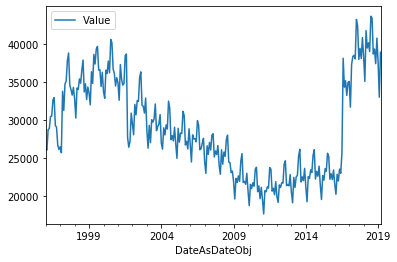

In [57]:
dataForPlot = df_date.resample("M").mean()
dataForPlot.loc[:,["Value"]].plot()

## Line chart of no of entries(Value) Vs months

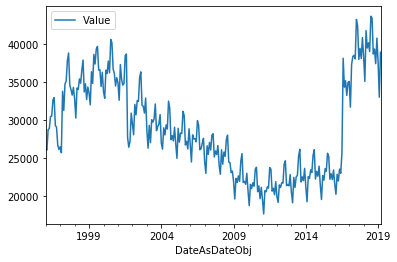

In [58]:
dataForPlot = df_date.resample("M").mean()
dataForPlot.loc[:,["Value"]].plot()

## Line chart of all the Measures of entries Vs no of entries over the years

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203316D7348>,
      dtype=object)

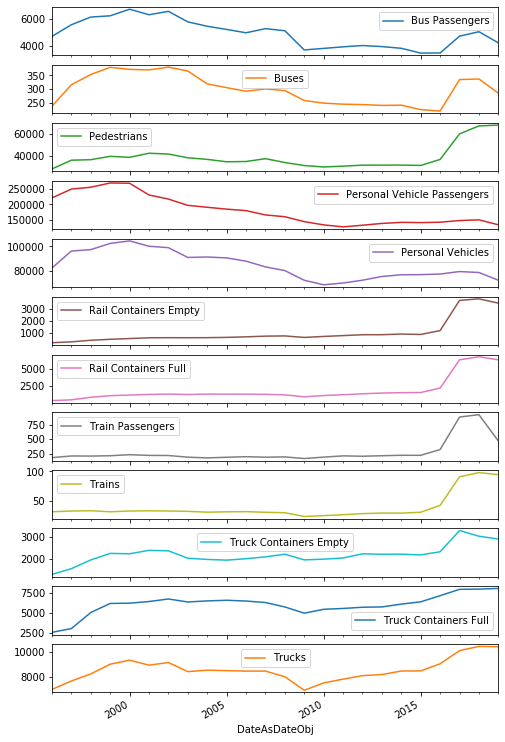

In [59]:
##Plot  by year
dataForPlot = df_date.loc[:,["Measure","Value"]]
dataForPlot = dataForPlot.groupby("Measure").resample("Y").mean()
dataForPlot.reset_index().pivot(index="DateAsDateObj",columns="Measure", values="Value").plot(subplots=True, figsize=(8,14))

## Line chart of all the states vs no of entries over the years

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020331A99848>,
      dtype=object)

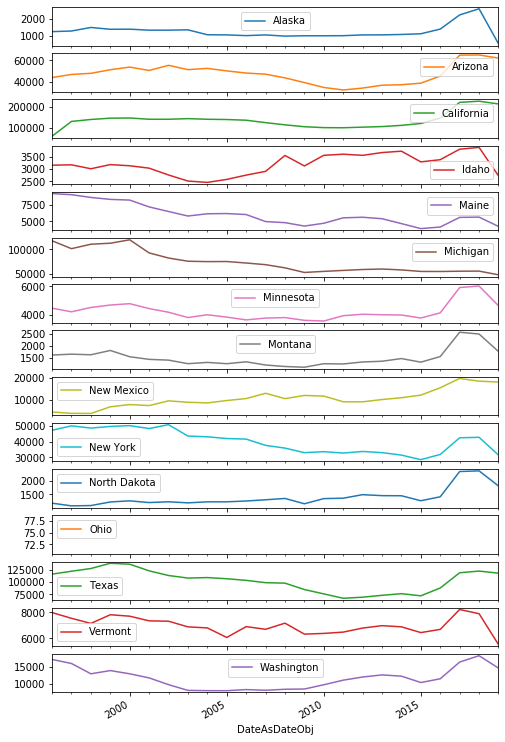

In [60]:
dataForPlot = df_date.loc[:,["State","Value"]]
dataForPlot = dataForPlot.groupby("State").resample("Y").mean()
dataForPlot.reset_index().pivot(index="DateAsDateObj",columns="State", values="Value").plot(subplots=True, figsize=(8,14))

## Line chart of all the measures of entries Vs no of entries over months

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020332502B48>,
      dtype=object)

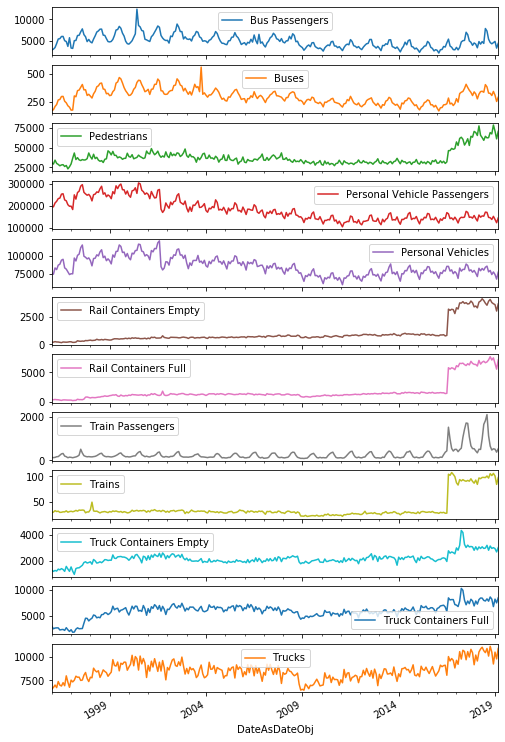

In [61]:
dataForPlot = df_date.loc[:,["Measure","Value"]]
dataForPlot = dataForPlot.groupby("Measure").resample("M").mean()
dataForPlot.reset_index().pivot(index="DateAsDateObj",columns="Measure", values="Value").plot(subplots=True, figsize=(8,14))

## Line Chart of all the States Vs no of entries over months


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020332A56488>,
      dtype=object)

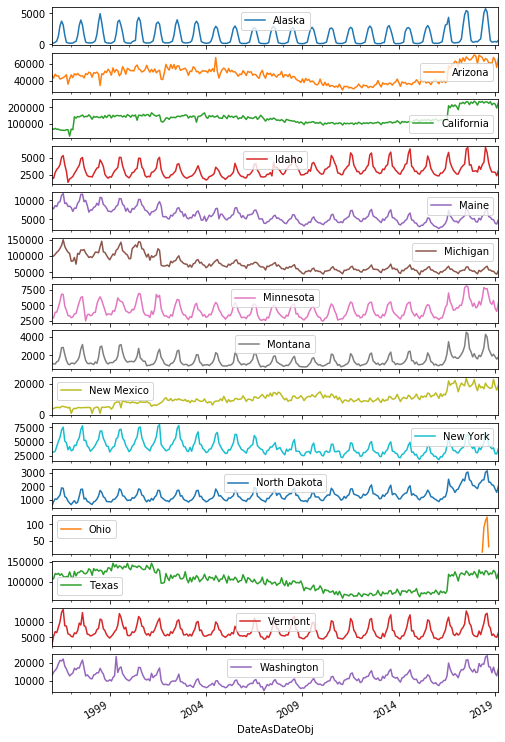

In [62]:
dataForPlot = df_date.loc[:,["State","Value"]]
dataForPlot = dataForPlot.groupby("State").resample("M").mean()
dataForPlot.reset_index().pivot(index="DateAsDateObj",columns="State", values="Value").plot(subplots=True, figsize=(8,14))